In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
file_name = "adult"
real_df = pd.read_csv(f"C:/Users/kalybeai-dxlc693/Desktop/GANS/modular-conditional-gan-main/datasets/input_reals/{file_name}.csv", ",")
syn_df = pd.read_csv(f"C:/Users/kalybeai-dxlc693/Desktop/GANS/modular-conditional-gan-main/datasets/output_synt/{file_name}.csv", ",")
real_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
syn_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,38.649660,3.958762,267541.60,10.895390,8.988639,2.003541,5.028685,0.046655,3.989629,0.999306,139.18309,6.369847,39.405155,38.952670,0
1,31.307398,3.969699,84230.01,10.896914,9.007653,3.966562,6.068594,0.962944,3.981870,0.995909,176.47935,7.346257,39.189490,38.994650,0
2,24.941446,3.979037,88178.62,10.959696,8.950465,4.118035,2.455203,1.048972,3.995400,1.000975,186.88274,16.173664,49.432594,39.183550,0
3,33.409230,3.971116,170892.66,10.918911,8.990616,4.066137,7.685011,1.083131,3.992321,1.004092,94.20084,-0.895832,39.278366,39.003952,0
4,26.202375,3.969805,196338.17,10.925645,8.982259,2.064211,6.642938,0.051071,3.991731,0.999279,59.29545,2.518017,37.128740,39.054558,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,52.221870,4.249679,85833.28,8.493013,10.070944,1.865410,2.577534,-0.025954,3.955513,0.910961,-131.60481,27.114773,52.502914,39.437470,1
32557,52.024693,3.935901,169088.14,10.583372,9.006127,1.977834,2.639101,-0.000850,3.996161,0.973931,8030.39200,4.415074,42.383850,39.171574,1
32558,36.556904,4.030960,191214.39,10.539510,9.112654,1.929159,10.801532,-0.015016,4.030955,0.975936,231.76457,17.705570,50.949950,38.747140,1
32559,50.811165,5.318193,90429.14,10.776703,9.266229,2.007773,2.736532,-0.005907,3.993296,0.947109,194.75786,10.717961,52.697670,39.129120,1


## Correlation Evaluation

In [4]:
real_corr, syn_corr = real_df.corr(), syn_df.corr()
diff_corr = real_corr - syn_corr

dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

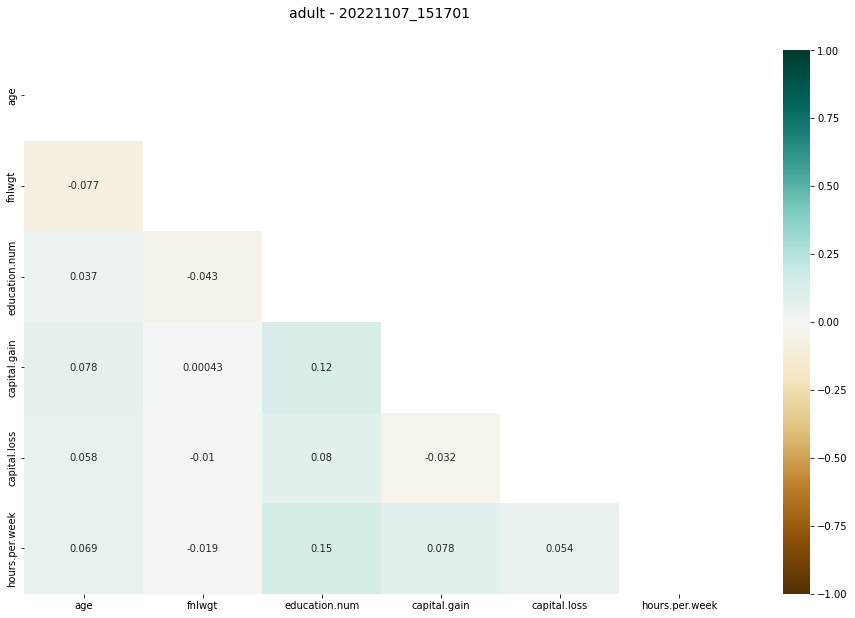

In [5]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(real_corr, dtype=np.bool))
dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

heatmap = sns.heatmap(real_corr,
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')

title = "Difference of Correlations (expected as close to zero)"
png_name = f"C:/Users/kalybeai-dxlc693/Desktop/GANS/modular-conditional-gan-main/datasets/output_synt/" +str(file_name) + str(dtime)+ ".png"
heatmap.set_title(f"{file_name} - {dtime} \n", fontdict={"fontsize":14}, pad=16)
plt.savefig(png_name)

## CumSum Evaluation

sadece sayısal değerleri alalım

In [6]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
real_df = real_df[["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]]
syn_df = syn_df[["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]]

In [8]:
real_scaler = MinMaxScaler((0, 1))
scaled_real = pd.DataFrame(real_scaler.fit_transform(real_df))
scaled_real.columns = real_df.columns

syn_scaler = MinMaxScaler((0, 1))
scaled_syn = pd.DataFrame(syn_scaler.fit_transform(syn_df))
scaled_syn.columns = syn_df.columns

In [9]:
# scaled_real["CROSSING"].sort_values().cumsum()

In [10]:
def get_cumsum_diff(feature):
    return scaled_syn[feature].sort_values().cumsum().values - scaled_real[feature].sort_values().cumsum().values

In [11]:
def cum_sum_export(scaled_real, scaled_syn, feature):
    cumsum_diff = get_cumsum_diff(feature)
    cumsum_real = scaled_real[feature].sort_values().cumsum().values
    cumsum_syn = scaled_syn[feature].sort_values().cumsum().values

    plt.axhline(0, color="gray", alpha=.35, label="Baseline")
    plt.plot(cumsum_diff, color="gray", label="Cumulative Sum Difference")
    plt.plot(scaled_real[feature].sort_values().cumsum().values, color="red", label="Real Cumulative Sum")
    plt.plot(scaled_syn[feature].sort_values().cumsum().values, color="blue", label="Syn Cumulative Sum")
    plt.title(f"{file_name} - {feature} - {dtime}")
    plt.savefig(f"C:/Users/kalybeai-dxlc693/Desktop/GANS/modular-conditional-gan-main/datasets/output_synt/{file_name}_{feature}_{dtime}.png")
    plt.legend()
    plt.clf()

In [12]:
for feature in real_df.columns:
    cum_sum_export(scaled_real, scaled_syn, feature)

<Figure size 432x288 with 0 Axes>